# Exploratory Data Analysis

The datasets included in the project are 


In [1]:
% pylab inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import pickle
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pickle.load(open('df.pkl','rb'))
print(df.head())

            date_block_num  shop_id  item_id  item_price  item_cnt_day
date                                                                  
2013-01-01               0       18     5823      2500.0           1.0
2013-01-01               0       46     1830       599.0           3.0
2013-01-01               0       14     1830       599.0           2.0
2013-01-01               0       14     1905       249.0           1.0
2013-01-01               0       14     2808       999.0           2.0


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 205326 entries, 2013-01-01 to 2015-10-31
Data columns (total 5 columns):
date_block_num    205326 non-null int64
shop_id           205326 non-null int64
item_id           205326 non-null int64
item_price        205326 non-null float64
item_cnt_day      205326 non-null float64
dtypes: float64(2), int64(3)
memory usage: 9.4 MB
None


In [4]:
df.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,205326.00,205326.00,205326.00,205326.00,205326.00
mean,16.89,31.02,8020.31,1553.79,2.21
std,8.73,17.14,6558.42,3198.10,7.71
min,0.00,2.00,1495.00,0.50,-16.00
25%,10.00,16.00,3340.00,449.00,1.00
50%,17.00,31.00,5822.00,914.75,1.00
75%,24.00,46.00,7894.00,1599.00,2.00
max,33.00,59.00,22088.00,28990.00,2169.00


The data shows that it also records return of items, which is recorded as negative sales, whereas item_cnt_day is displayed as negative.

In [294]:
df['Sales'] = df['item_price']*df['item_cnt_day']
total_sale = df.groupby(df.index)['item_cnt_day'].sum()
total_rev = df.groupby(df.index)['Sales'].sum()

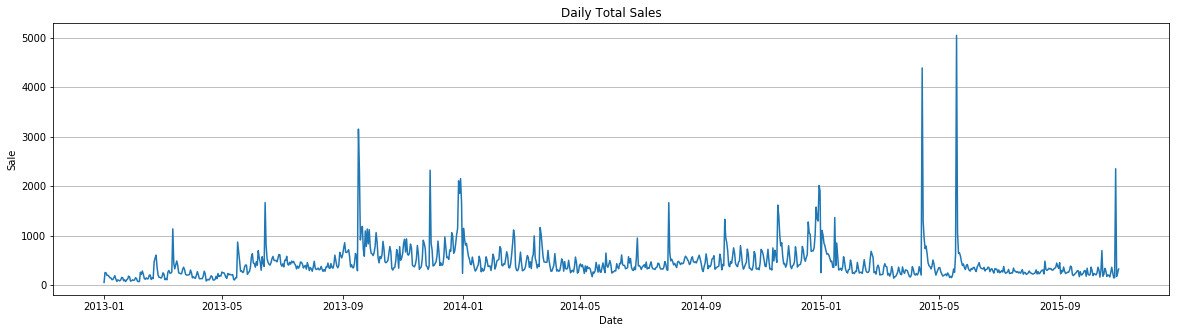

In [301]:
plt.subplots(figsize=(20, 5))
plt.plot(total_sale)
plt.ylabel('Sale')
plt.xlabel('Date')
plt.grid(True, axis='y')
plt.title('Daily Total Sales')
plt.show()

We can see that there is a slight annual trend of increased sales around Janurary of each year. However, there are many spikes of sales that do not follow any seasonality.

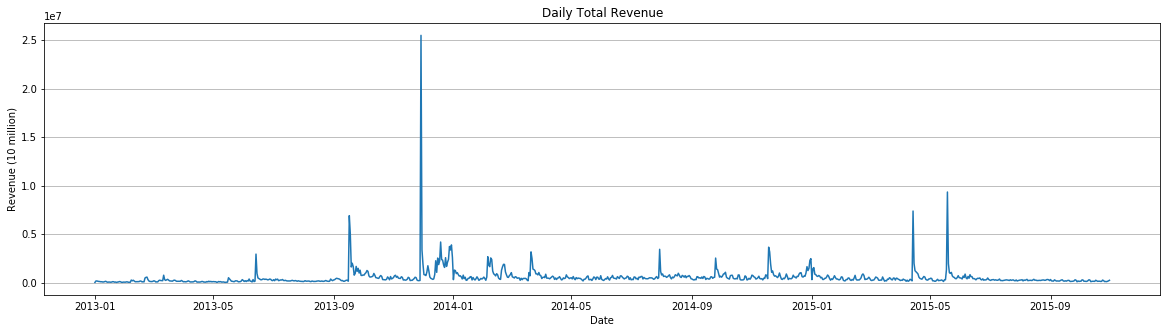

In [300]:
plt.subplots(figsize=(20, 5))
plt.plot(total_rev)
plt.ylabel('Revenue (10 million)')
plt.xlabel('Date')
plt.grid(True, axis='y')
plt.title('Daily Total Revenue')
plt.show()

By comparing sale quanity and revnue, we can see that most of the spikes in quantity sold also corresponding to spike in revenue. Interestingly, the day with the highest revenue only comes in fourth in quantity sold. 

## Categorical Analysis

In [114]:
# Load and merge item category IDs to sales data
df_items = pd.read_csv('items.csv')
df_items = df_items[['item_id','item_category_id']]

In [127]:
print('Number of different categories: %i' % len(df_items.item_category_id.unique()))

Number of different categories: 84


In [115]:
unique_item = pd.DataFrame(df_cat.item_id.unique())
unique_item['item_id'] = unique_item[0]
unique_item = unique_item.drop(0, axis=1)
print(unique_item.head())
cat_item = pd.merge(unique_item, df_items, on='item_id')
print(cat_item.head())

   item_id
0     5823
1     1830
2     1905
3     2808
4    22088
   item_id  item_category_id
0     5823                35
1     1830                30
2     1905                30
3     2808                30
4    22088                83


In [132]:
print('Total number of categories in filtered data set: %i' %len(cat_item.item_category_id.unique()))

Total number of categories in filtered data set: 14


Compared to the total number of categories in the company's data, only 14 of them are included in the data set that we are focusing on.

In [116]:
# Obtain counts of items in each category
cat_item_count = cat_item.groupby(cat_item['item_category_id'])['item_id'].count()

cat_item_count.index = cat_item_count.index.astype(str)

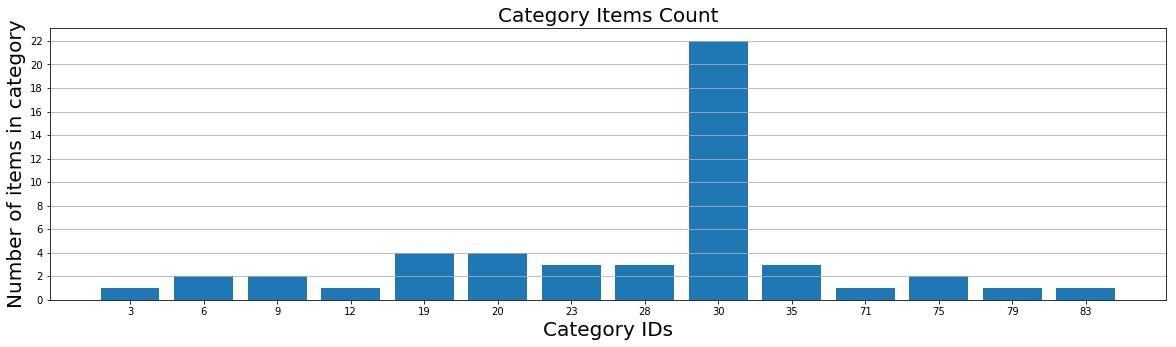

In [117]:
plt.subplots(figsize=(20, 5))
plt.bar(cat_item_count.index, cat_item_countitem_count)
plt.ylabel('Number of items in category', fontsize=20)
plt.xticks(cat_sold.index)
plt.yticks(np.arange(0,23,2))
plt.xlabel('Category IDs', fontsize=20)
plt.title('Category Items Count', fontsize=20)
plt.grid(True, axis='y')

In [118]:
# Produce categorical and item sales dataframe
df_cat = pd.merge(df, df_items, on='item_id')
df_cat['Sales'] = df_cat['item_price'] * df_cat['item_cnt_day']
df_cat.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,Sales
0,0,18,5823,2500.00,1.00,35,2500.00
1,0,42,5823,2490.00,1.00,35,2490.00
2,0,56,5823,2500.00,1.00,35,2500.00
3,0,31,5823,2495.28,1.00,35,2495.28
4,0,56,5823,2500.00,1.00,35,2500.00


In [284]:
# Obtain sales of each category
cat_item_sales = df_cat.groupby(df_cat['item_category_id'])['item_cnt_day'].count()

cat_item_sales.index = cat_item_sales.index.astype(str)

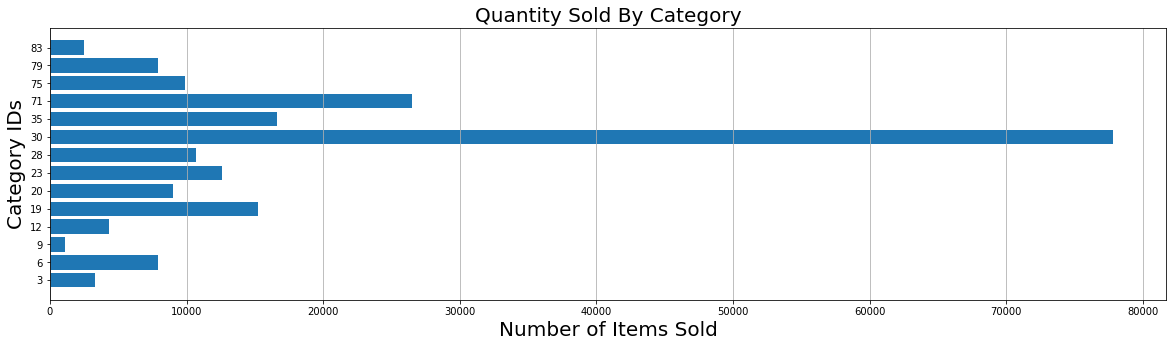

In [285]:
plt.subplots(figsize=(20, 5))
plt.barh(cat_item_sales.index, cat_item_sales)
plt.xlabel('Number of Items Sold', fontsize=20)
plt.yticks(cat_sold.index)
plt.ylabel('Category IDs', fontsize=20)
plt.title('Quantity Sold By Category', fontsize=20)
plt.grid(True, axis='x')

In [121]:
# Obtain sales of each category
cat_sold = df_cat.groupby(df_cat['item_category_id'])['Sales'].sum()

cat_sold.index = cat_sold.index.astype(str)

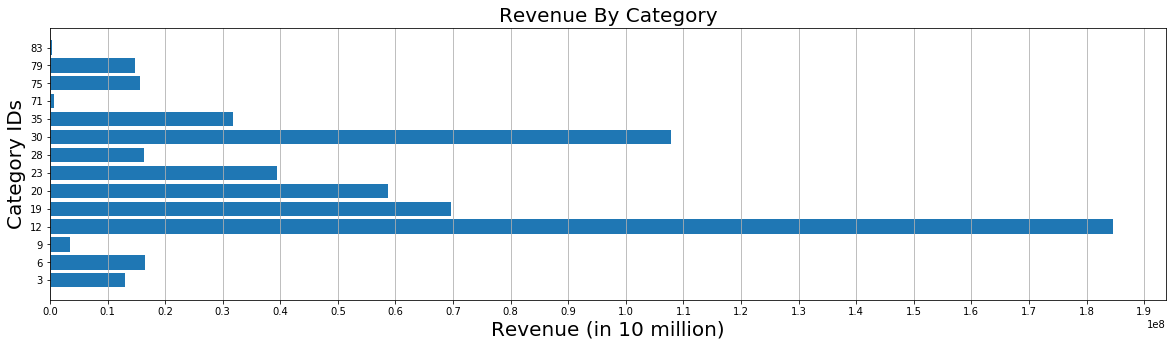

In [282]:
plt.subplots(figsize=(20, 5))
plt.barh(cat_sold.index, cat_sold)
plt.xlabel('Revenue (in 10 million)', fontsize=20)
plt.yticks(cat_sold.index)
plt.xticks(np.arange(0, 2*10**8, 10**7))
plt.ylabel('Category IDs', fontsize=20)
plt.title('Revenue By Category', fontsize=20)
plt.grid(True, axis='x')

Although category ID 30 has nearly half of the entire item IDs and has highest number of units sold, it ranks only second in terms of revenue. There is only one item ID in category 12, but it has the highest revenue due to its high price point.

## Shop Analysis

In [135]:
print('Number of shops in data set: %i' % len(df.shop_id.unique()))

Number of shops in data set: 40


In [136]:
shop_rev = df_cat.groupby(['shop_id'])['Sales'].sum().sort_index()
shop_rev = pd.DataFrame(shop_rev)
print(shop_rev.head())

              Sales
shop_id            
2       10901203.42
3        7111580.18
4        9841699.84
5        8362179.19
6       21551279.82


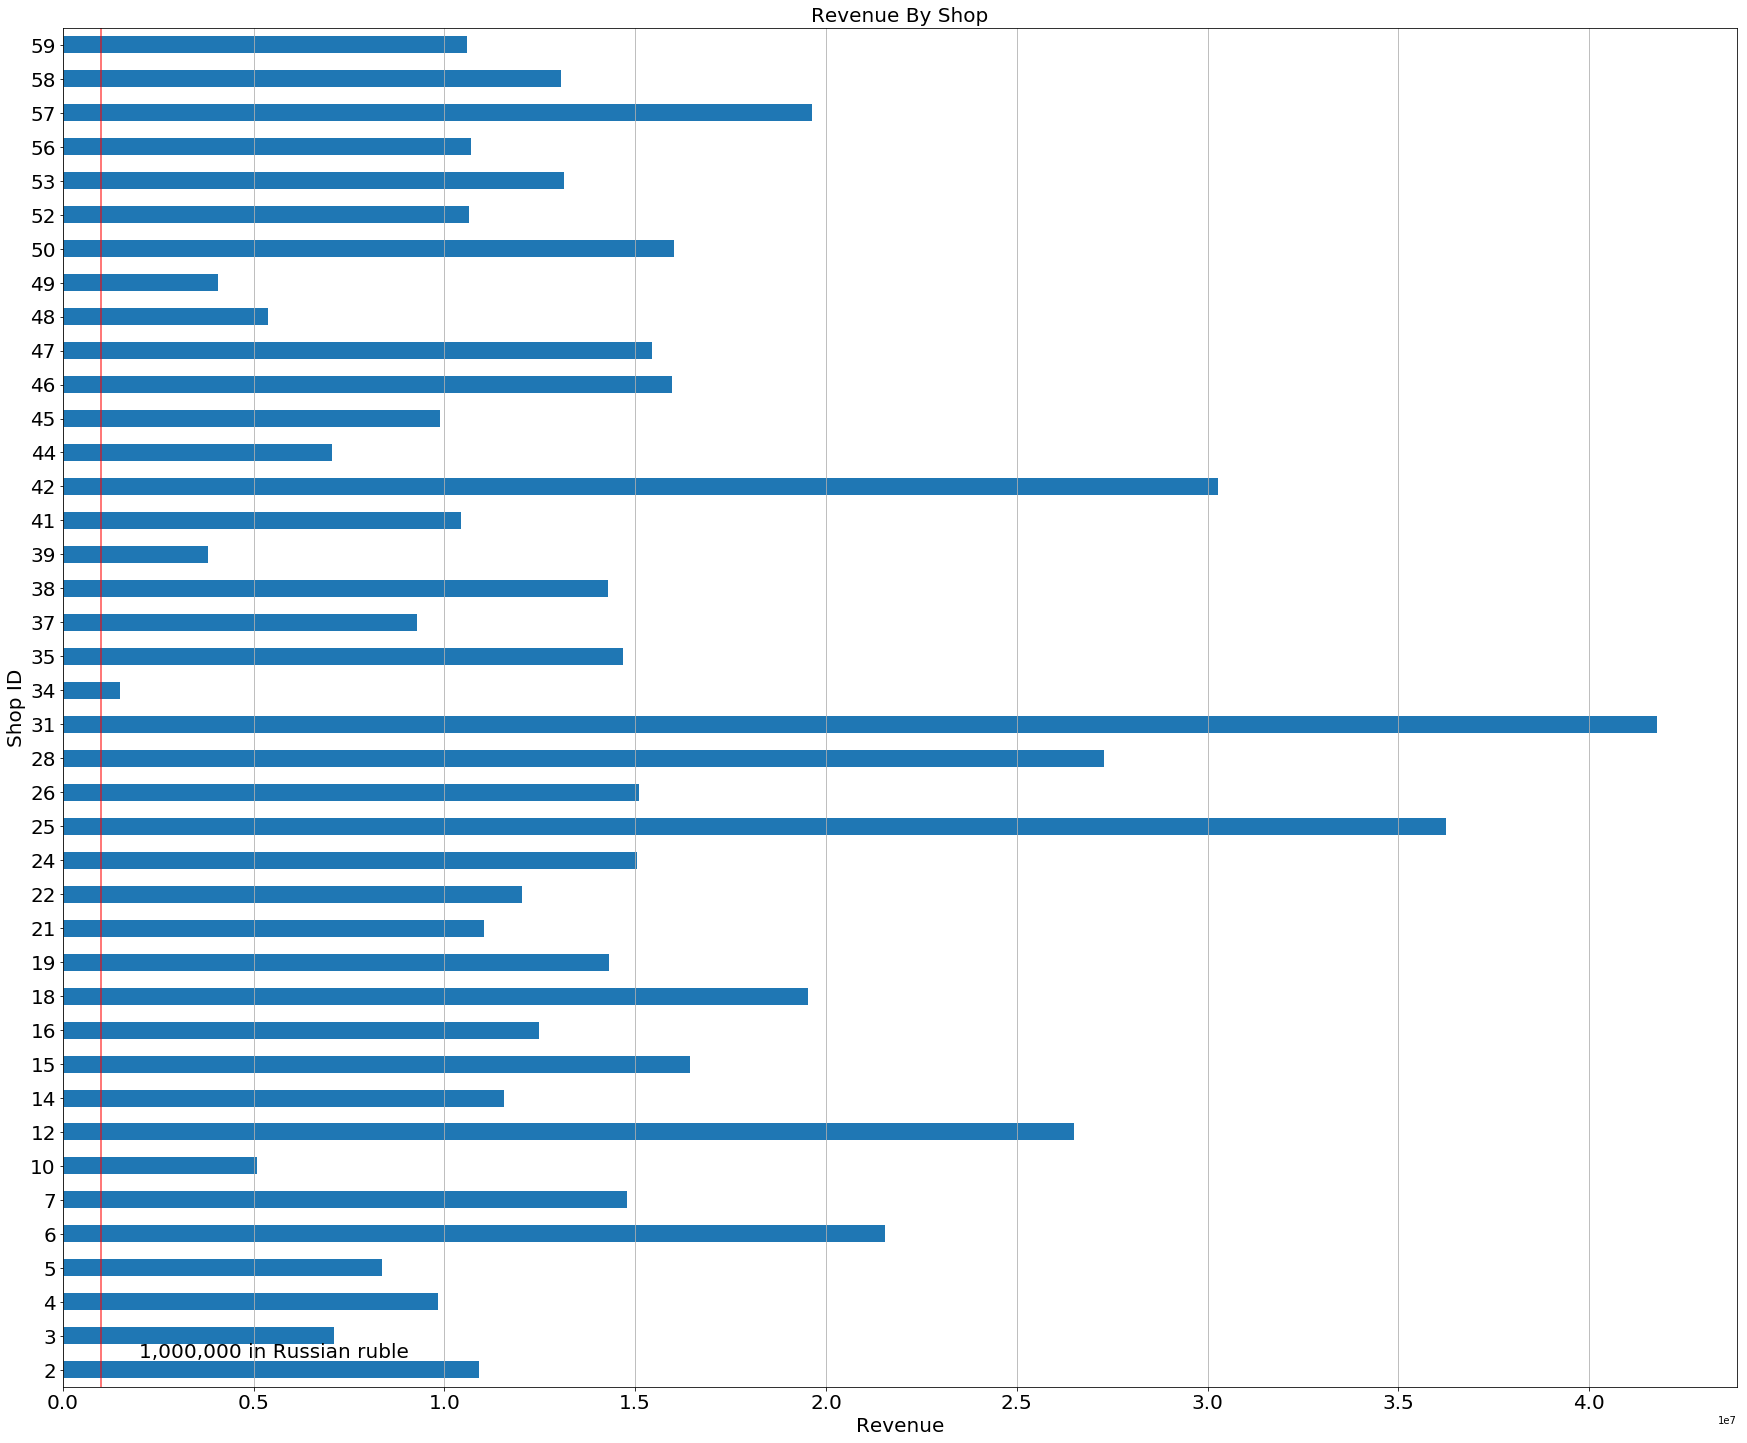

In [281]:
shop_rev.plot.barh(figsize=[30,25], fontsize=20, legend=False)
plt.ylabel('Shop ID', fontsize=20)
plt.xlabel('Revenue', fontsize=20)
plt.title('Revenue By Shop', fontsize=20)
plt.grid(True, axis='x')
plt.axvline(x=1000000, color='r', alpha=.7, label='1000000')
plt.text(2000000,0.35,'1,000,000 in Russian ruble', fontsize=20)
plt.show()

In [198]:
%%time
# Create a grid for visualizing the time span of each items in stores

shop_timeframe = pd.DataFrame(index = pd.date_range(start='2013-01-01', end='2015-10-31'))
numb_frame = 1
for i in sort(df.shop_id.unique()):
    shop_time = df.loc[df['shop_id'] == i].sort_index()
    shop_timeframe[i] = shop_timeframe.index.to_series().apply(lambda x: numb_frame if x >= shop_time.index.min() and x <= shop_time.index.max() else numpy.NaN)
    numb_frame = numb_frame + 1

print(shop_timeframe.sort_index().head())

            2    3    4   5    6   7    10  12  14  15  ...     47  48  49  \
2013-01-01   1  nan  nan nan  nan   6  nan nan   9  10  ...    nan nan nan   
2013-01-02   1 2.00 3.00 nan 5.00   6  nan nan   9  10  ...  31.00 nan nan   
2013-01-03   1 2.00 3.00 nan 5.00   6  nan nan   9  10  ...  31.00 nan nan   
2013-01-04   1 2.00 3.00 nan 5.00   6 7.00 nan   9  10  ...  31.00 nan nan   
2013-01-05   1 2.00 3.00 nan 5.00   6 7.00 nan   9  10  ...  31.00 nan nan   

              50    52    53    56  57  58    59  
2013-01-01   nan   nan   nan   nan nan nan   nan  
2013-01-02 34.00 35.00 36.00 37.00 nan nan 40.00  
2013-01-03 34.00 35.00 36.00 37.00 nan nan 40.00  
2013-01-04 34.00 35.00 36.00 37.00 nan nan 40.00  
2013-01-05 34.00 35.00 36.00 37.00 nan nan 40.00  

[5 rows x 40 columns]
CPU times: user 761 ms, sys: 7.43 ms, total: 768 ms
Wall time: 781 ms


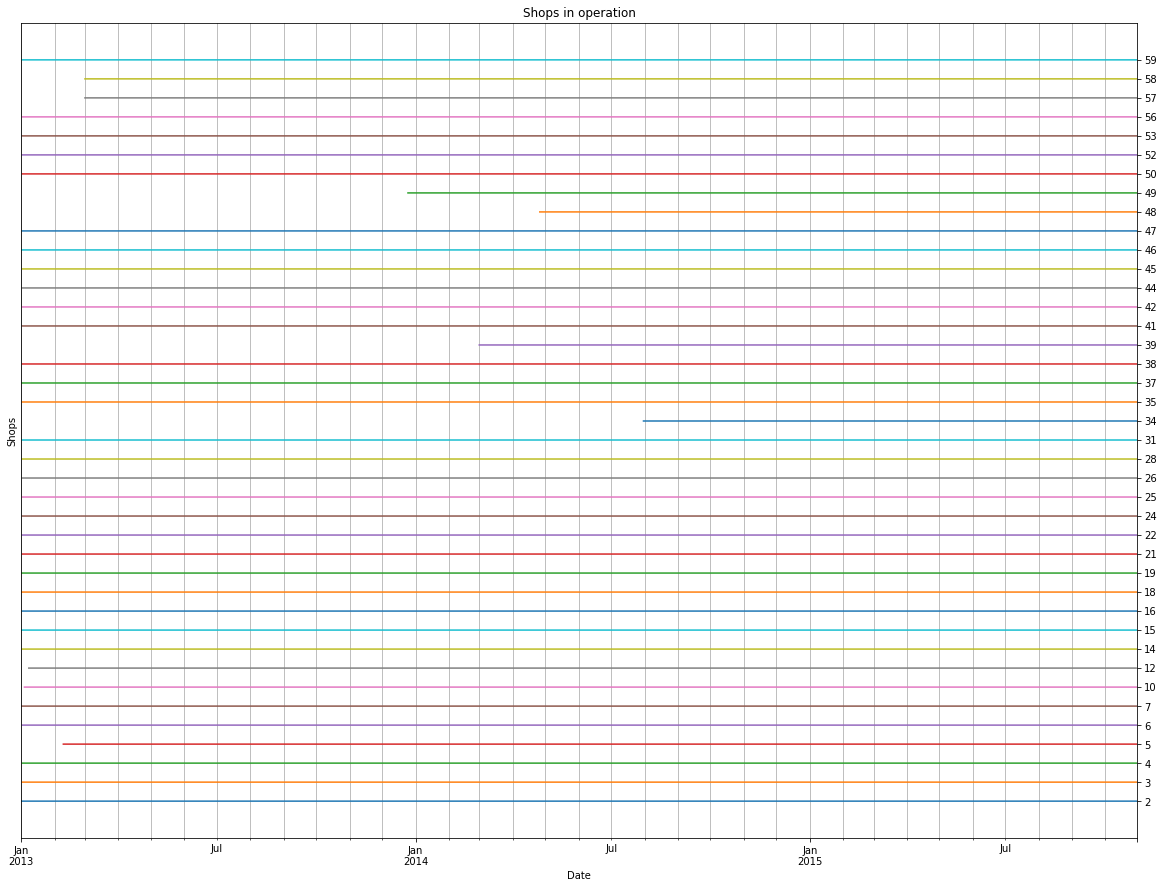

In [20]:
df_transpose = shop_timeframe.transpose()

p = shop_timeframe.plot(figsize = (20,15), legend=False)
p.yaxis.tick_right()
p.set_yticks(np.arange(1,len(df_transpose.index)+1,1))
p.set_yticklabels(df_transpose.index)
p.set_xlabel('Date')
p.set_ylabel('Shops')
p.set_xlim('2013-01-01', '2015-10-31')
p.grid(axis = 'x', which='both')
p.set_title('Shops in operation')
plt.show()

The graph above shows that all stores that are included in the data for forecasting have been in operation for at least 12 months. Majority of them have been in operator for more than 24 months. Shop ID 34 has the shortest operating period and also have the lowest revenue among the stores.

## Item Analysis

In [246]:
# Obtain sales of each category
item_count = df_cat.groupby(df_cat['item_id'])['item_cnt_day'].sum()

item_count.index = item_count.index.astype(str)

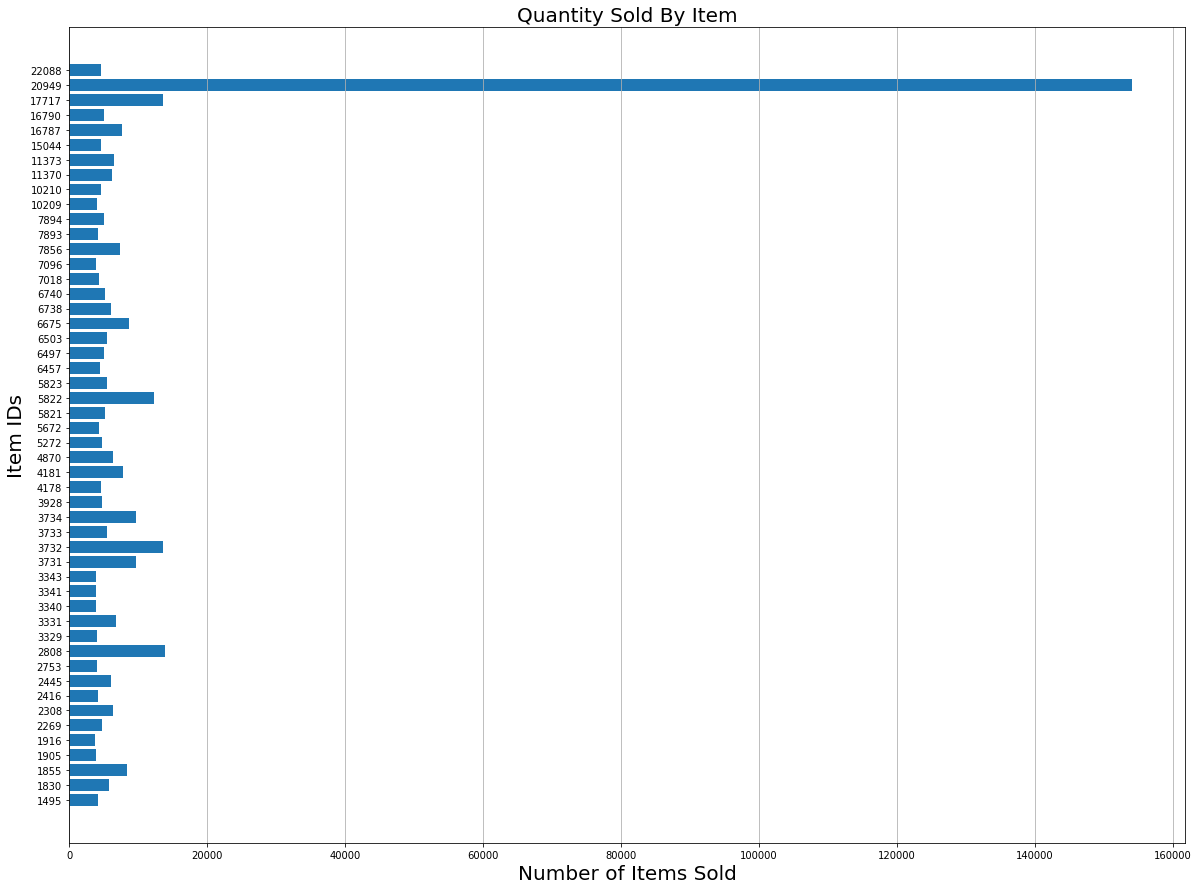

In [286]:
plt.subplots(figsize=(20, 15))
plt.barh(item_count.index, item_count)
plt.xlabel('Number of Items Sold', fontsize=20)
plt.yticks(item_count.index)
plt.ylabel('Item IDs', fontsize=20)
plt.title('Quantity Sold By Item', fontsize=20)
plt.grid(True, axis='x')

In [252]:
# Obtain sales of each category
item_rev = df_cat.groupby(df_cat['item_id'])['Sales'].sum()

item_rev.index = item_rev.index.astype(str)

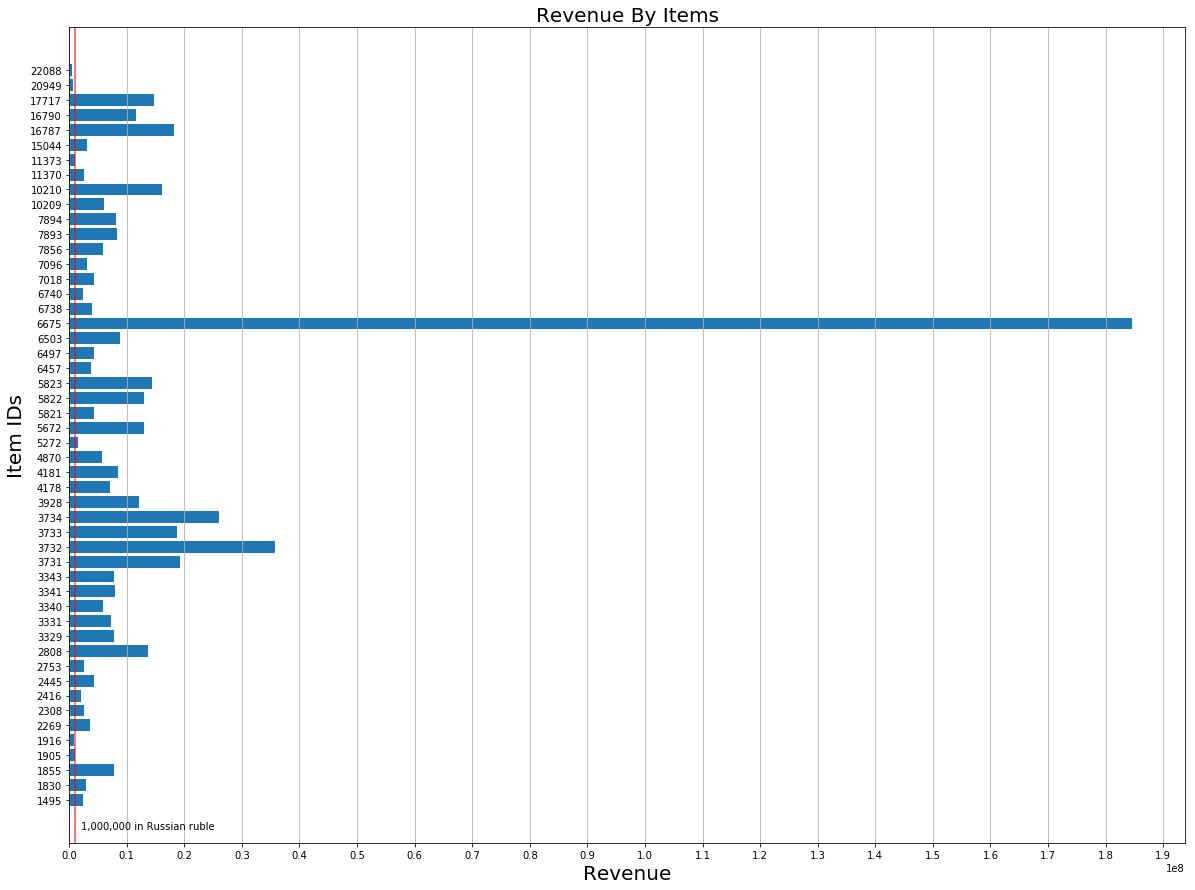

In [278]:
plt.subplots(figsize=(20, 15))
plt.barh(item_rev.index, item_rev)
plt.xlabel('Revenue', fontsize=20)
plt.xticks(np.arange(0, 2*10**8, 10**7))
plt.ylabel('Item IDs', fontsize=20)
plt.yticks(item_count.index)
plt.title('Revenue By Items', fontsize=20)
plt.axvline(x=1000000, color='r', alpha=.7, label='1000000')
plt.text(x=2000000, y=-2,s='1,000,000 in Russian ruble', fontsize=10)
plt.grid(True, axis='x')

Item ID 20949 is one of the lowest grossing item despite the number of items sold dwarfed other items. On the contrary, item ID 6675 has quantity sold slightly higher than the average, but it has more than 4 times higher revenue than the item with the second highest revenue.

In [30]:
# Create a grid for visualizing the time span of each items in stores

item_timeframe = pd.DataFrame(index = pd.date_range(start='2013-01-01', end='2015-10-31'))
numb_frame = 1
for i in sort(df.item_id.unique()):
    item_time = df.loc[df['item_id'] == i].sort_index()
    item_timeframe[i] = item_timeframe.index.to_series().apply(lambda x: numb_frame if x >= item_time.index.min() and x <= item_time.index.max() else numpy.NaN)
    numb_frame = numb_frame + 1
    
item_timeframe.sort_index().head()

,1495,1830,1855,1905,1916,2269,2308,2416,2445,2753,...,10209,10210,11370,11373,15044,16787,16790,17717,20949,22088
2013-01-01,nan,2.00,nan,4,5.00,nan,7,8.00,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,48,nan,50
2013-01-02,nan,2.00,nan,4,5.00,nan,7,8.00,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,48,nan,50
2013-01-03,nan,2.00,nan,4,5.00,nan,7,8.00,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,48,nan,50
2013-01-04,nan,2.00,nan,4,5.00,nan,7,8.00,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,48,nan,50
2013-01-05,nan,2.00,nan,4,5.00,nan,7,8.00,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,48,nan,50


In [31]:
df_transpose = item_timeframe.transpose()

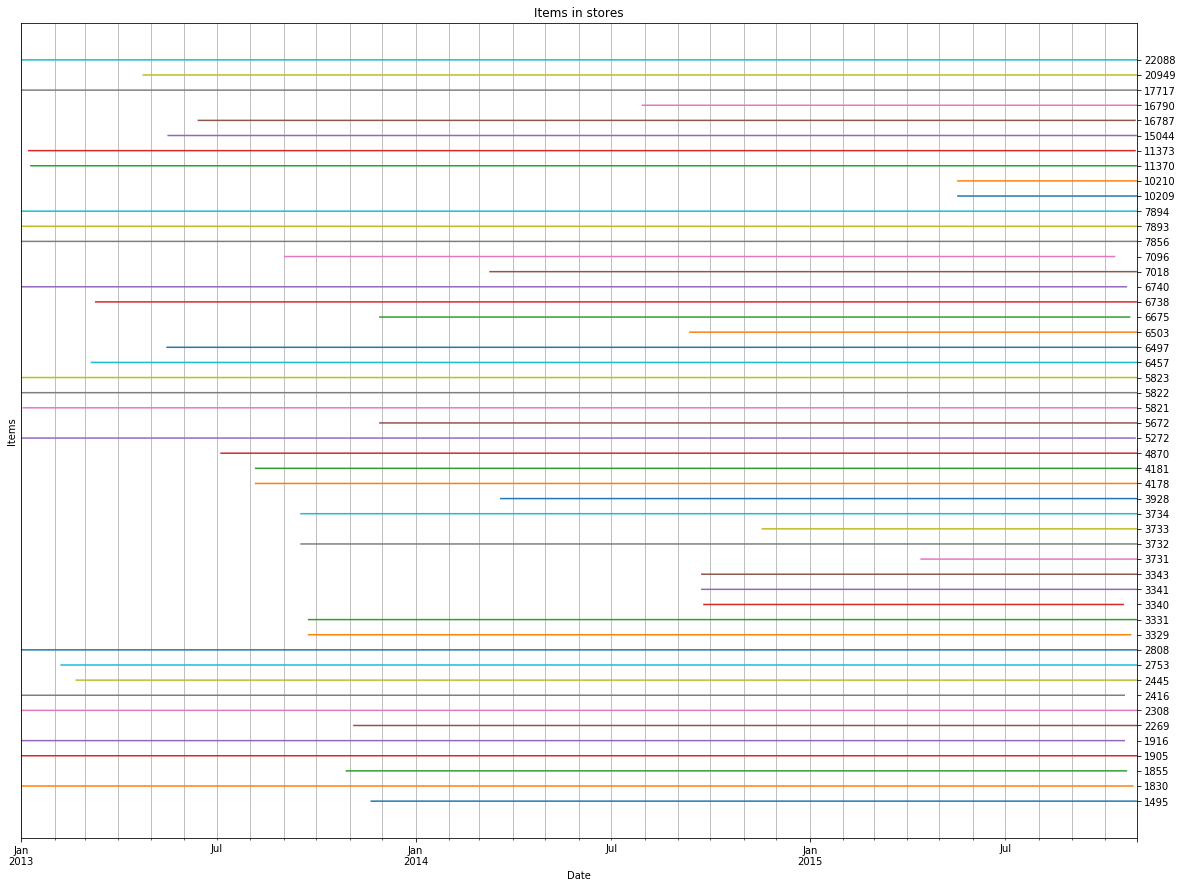

In [33]:
p = item_timeframe.plot(figsize = (20,15), legend=False)
p.yaxis.tick_right()
p.set_yticks(np.arange(1,51,1))
p.set_yticklabels(df_transpose.index)
p.set_xlabel('Date')
p.set_ylabel('Items')
p.set_xlim('2013-01-01', '2015-10-31')
p.grid(axis = 'x', which='both')
p.set_title('Items in stores')
plt.show()

The graph above shows that there are large variations of amount of time each items have been available in stores. Less than two dozens of items have been in stores for the entire duration of the data. There are 4 item IDs that have been in stores for 12 months or less.